In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
observations = 1000 # N

# number of variables: k, x = k1, z = 
# vertical matrices
xs = np.random.uniform(-10, 10, size = (observations, 1)) #x: var 1
zs = np.random.uniform(-10, 10, (observations,1)) #z: var 2
                
generated_inputs = np.column_stack((xs, zs)) # stack into a matrix: n x k
generated_inputs.shape

noise = np.random.uniform(-1, 1, (observations, 1)) # same shape as xs, zs
targets = 2*xs-3*zs + 5 + noise
targets.shape # y: desired targets

(1000, 1)

In [4]:
# save inputs and targets as tensor ("a 3D matrix")
np.savez('tensorflow_intro', inputs = generated_inputs, targets=targets)

In [7]:
# loading data
training_data = np.load('tensorflow_intro.npz')
input_size = 2 # two variables, k=2
output_size = 1 # m


# employing tensorflows

In [14]:
# build model 

# tf.keras.layers.Dense(): takes the inputs provided to the model and calculates 
# the dot product of the input and weights and adds the bias. I.e. 
# I.e. outputs = np.dot(inputs, weights) + biases # 1000x2 dot 2x1 + 1x1
model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
# objective function + optimization algorithm
# SGD: stochaistic gradient descent
# mean_squared_error: L2
model.compile(optimizer='sgd', loss ='mean_squared_error')

#fitting the model
#  epoch: number of iterations
# verbose: 0: silent, 1: progress bar, verbose: 2
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 645us/step - loss: 22.3553
Epoch 2/100
32/32 [==============================] - 0s 731us/step - loss: 4.4857
Epoch 3/100
32/32 [==============================] - 0s 635us/step - loss: 1.4744
Epoch 4/100
32/32 [==============================] - 0s 598us/step - loss: 0.6608
Epoch 5/100
32/32 [==============================] - 0s 638us/step - loss: 0.4211
Epoch 6/100
32/32 [==============================] - 0s 600us/step - loss: 0.3612
Epoch 7/100
32/32 [==============================] - 0s 600us/step - loss: 0.3454
Epoch 8/100
32/32 [==============================] - 0s 656us/step - loss: 0.3398
Epoch 9/100
32/32 [==============================] - 0s 599us/step - loss: 0.3417
Epoch 10/100
32/32 [==============================] - 0s 557us/step - loss: 0.3407
Epoch 11/100
32/32 [==============================] - 0s 565us/step - loss: 0.3422
Epoch 12/100
32/32 [==============================] - 0s 616us/step - loss: 0.3358
Epoch 13/100

32/32 [==============================] - 0s 541us/step - loss: 0.3368
Epoch 100/100
32/32 [==============================] - 0s 536us/step - loss: 0.3451


In [22]:
# weight and biases
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[1]
print(weights, biases)

[[ 1.9983836]
 [-2.989361 ]] [4.9976044]


In [28]:
# EXTRACT OUTPUT
y = model.predict_on_batch(training_data['inputs']).round(1)

Text(0, 0.5, 'targets')

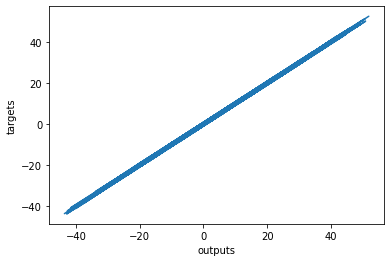

In [31]:
y_plot= np.squeeze(y)
t_plot= np.squeeze(training_data['targets'])
fig = plt.figure()
plt.plot(y_plot, t_plot)
plt.xlabel('outputs')
plt.ylabel('targets')